# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, regularizers

In [2]:
#LOAD THE DATA
print("Loading and preprocessing data...")
df = pd.read_csv('/content/Water_Portability.csv')
df = df.fillna(df.mean())

Loading and preprocessing data...


Plot the Data Appropriately

In [3]:
# Data splitting
X = df.drop('Potability', axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)



In [4]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Data Visualization Functions
def plot_data_distribution():
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.ravel()

    for idx, column in enumerate(X.columns):
        sns.histplot(data=df, x=column, hue='Potability', ax=axes[idx])
        axes[idx].set_title(f'Distribution of {column}')

    plt.tight_layout()
    plt.show()

In [7]:

def plot_correlation_matrix():
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title('Feature Correlation Matrix')
    plt.show()

# Each Memeber Defines their model Here

In [8]:
# Model Definition
def create_model(l1_strength=0.01):
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu',
                    kernel_regularizer=regularizers.l1(l1_strength),
                    input_shape=(X_train.shape[1],)),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu',
                    kernel_regularizer=regularizers.l1(l1_strength)),
        layers.Dropout(0.2),
        layers.Dense(16, activation='relu',
                    kernel_regularizer=regularizers.l1(l1_strength)),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

# Start the training Process

In [9]:
# Training and Evaluation Functions
def train_and_evaluate_model():
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    model = create_model(l1_strength=0.01)

    history = model.fit(
        X_train_scaled, y_train,
        validation_data=(X_val_scaled, y_val),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )

    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
    print(f"\nTest Accuracy: {test_accuracy:.4f}")

    return model, history

In [10]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Model Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()

    plt.tight_layout()
    plt.show()

Plotting data distributions...


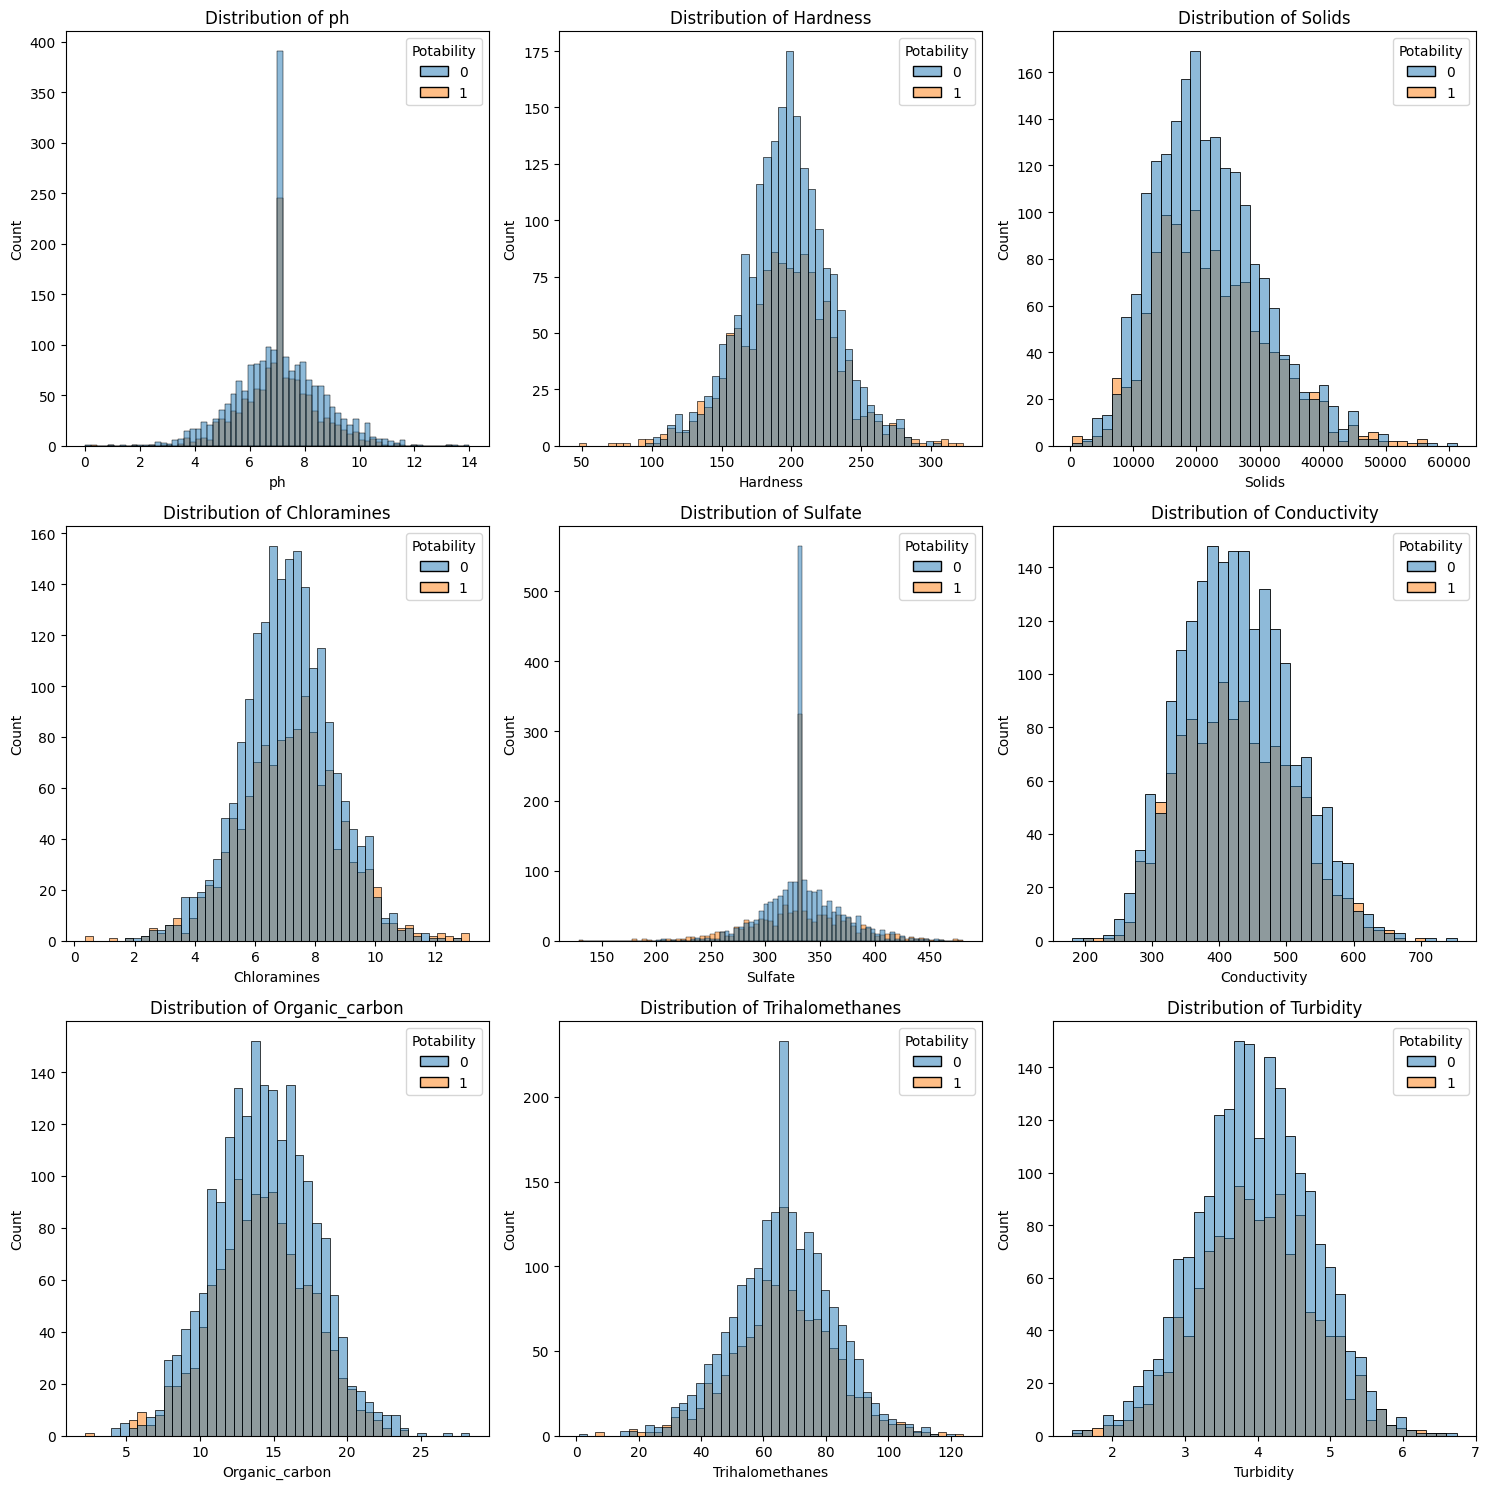

Plotting correlation matrix...


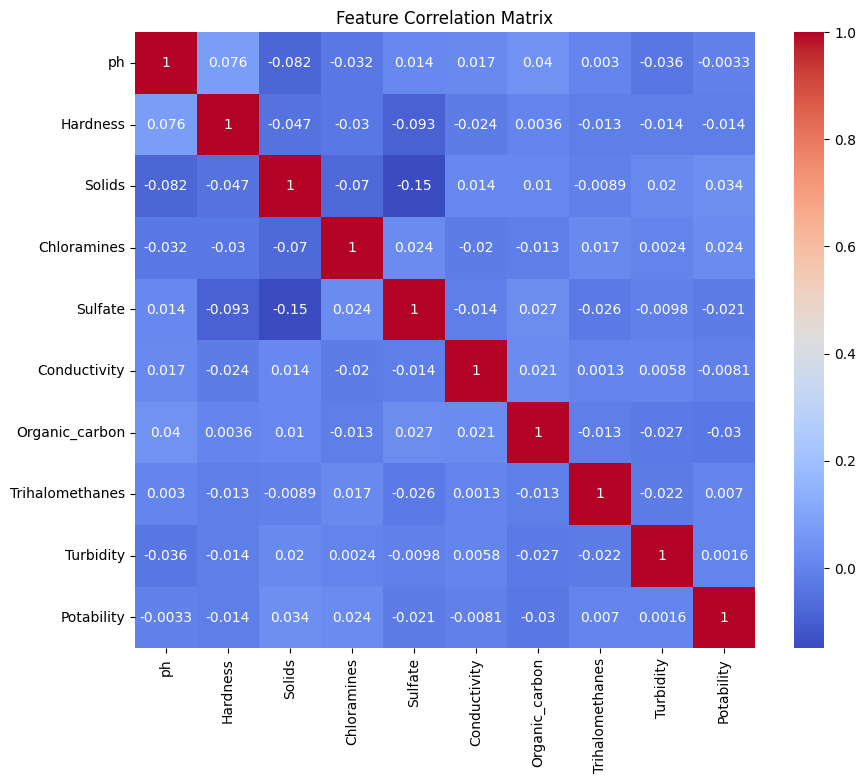


Training model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5347 - loss: 4.4801 - val_accuracy: 0.6100 - val_loss: 3.0900
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5844 - loss: 2.7180 - val_accuracy: 0.6100 - val_loss: 1.7247
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6107 - loss: 1.4870 - val_accuracy: 0.6100 - val_loss: 0.9433
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6136 - loss: 0.8591 - val_accuracy: 0.6100 - val_loss: 0.7174
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6025 - loss: 0.7046 - val_accuracy: 0.6100 - val_loss: 0.6776
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6036 - loss: 0.6786 - val_accuracy: 0.6100 - val_loss: 0.6731
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5876 - loss: 0.6824 - val_accuracy: 0.6100 - val_loss: 0.6723
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6167 - loss: 0.6696 - val_accuracy: 0.6100 - v

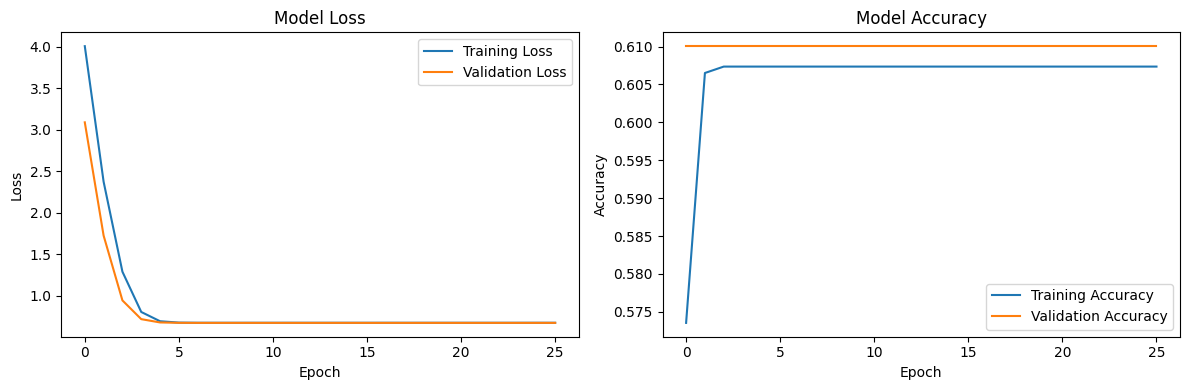


Model saved as 'water_quality_model.h5'


In [11]:
# Main execution
if __name__ == "__main__":
    # Plot data distributions and correlations
    print("Plotting data distributions...")
    plot_data_distribution()

    print("Plotting correlation matrix...")
    plot_correlation_matrix()

    # Train and evaluate model
    print("\nTraining model...")
    model, history = train_and_evaluate_model()

    # Plot training history
    print("\nPlotting training history...")
    plot_training_history(history)

    # Save the model
    model.save('water_quality_model.h5')
    print("\nModel saved as 'water_quality_model.h5'")

Model Benchmarks

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test_scaled, y_test):
    # Get predictions
    y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
    y_pred_prob = model.predict(X_test_scaled)

    # Generate classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print(f"\nROC AUC Score: {roc_auc:.4f}")

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return {
        'confusion_matrix': cm,
        'roc_auc': roc_auc,
        'predictions': y_pred,
        'probabilities': y_pred_prob
    }

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       306
           1       0.00      0.00      0.00       186

    accuracy                           0.62       492
   macro avg       0.31      0.50      0.38       492
weighted avg       0.39      0.62      0.48       492


ROC AUC Score: 0.5064


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


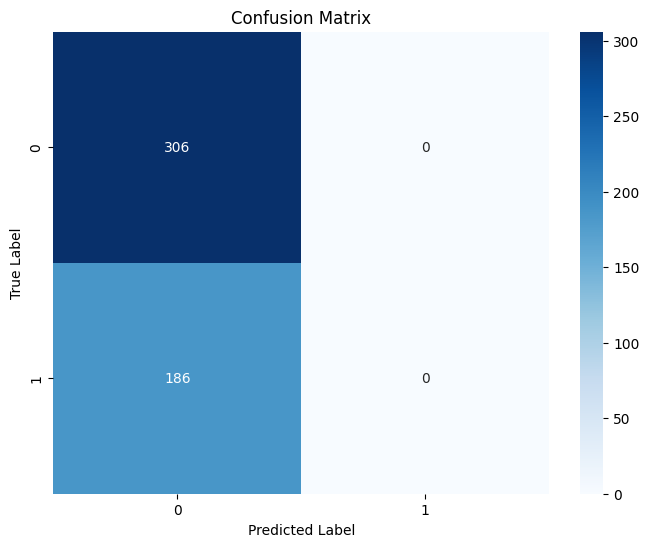

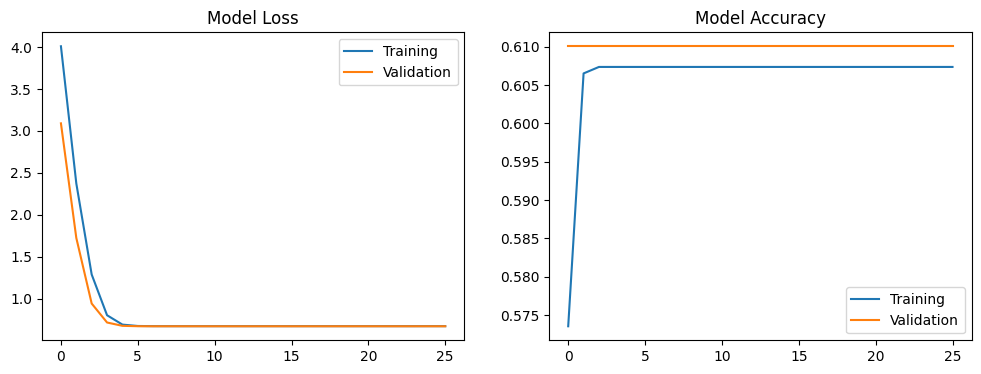

In [13]:

# Plot training history
def plot_training_metrics(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Loss plot
    ax1.plot(history.history['loss'], label='Training')
    ax1.plot(history.history['val_loss'], label='Validation')
    ax1.set_title('Model Loss')
    ax1.legend()

    # Accuracy plot
    ax2.plot(history.history['accuracy'], label='Training')
    ax2.plot(history.history['val_accuracy'], label='Validation')
    ax2.set_title('Model Accuracy')
    ax2.legend()

    plt.show()

# Usage:
metrics = evaluate_model(model, X_test_scaled, y_test)
plot_training_metrics(history)